## Интеллектуальный анализ данных – весна 2024
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html).

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [71]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
y
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования. Используйте [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html).

In [72]:
X.isna().sum().sum()

0

In [ ]:
# в наборе нет пропущенных значений

In [73]:
(X.dtypes=='object').any().any()

False

In [ ]:
# в наборе нет категориальных данных

**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

Используйте аргумент `stratify` при разбиении. Почему это важно?

In [75]:
np.random.seed(44)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)
#stratify помогает оставить такую же пропорцию значений целевой перменной в train и test как и в изначальном датафрейме, что поможет сбалансировать данные
# и избежать появление несбалансированных данных, сильно отличающихся от изначального датафрейма

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [76]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler


In [77]:
X_train1=X_train[['alcohol','magnesium']]
X_test1=X_test[['alcohol','magnesium']]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train1)
X_test_scaled = scaler.transform(X_test1)
k=[1,3,5,10,15,25]
learnedKNN=[]
print('NN      Train   Test')
for i in k:
  clf = KNeighborsClassifier(n_neighbors=i, p=2, n_jobs=2)
  clf.fit(X_train_scaled, y_train)
  learnedKNN.append(clf)
  y_train_predicted = clf.predict(X_train_scaled)
  # print(str(i) + '   '+ str(round(np.mean(y_train == y_train_predicted),2)),end=' ')
  y_predicted = clf.predict(X_test_scaled)
  # print(' '+ str(round(np.mean(y_test == y_predicted),2)))

  print (f"{i}\t{round(np.mean(y_train == y_train_predicted),2)}\t{round(np.mean(y_test == y_predicted),2)}")







NN      Train   Test
1	1.0	0.72
3	0.8	0.72
5	0.77	0.76
10	0.76	0.78
15	0.75	0.76
25	0.73	0.78


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/).

In [10]:
!pip install mlxtend

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [11]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов.
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново.
6. Построение графика может занять некоторое время – придётся немного подождать!

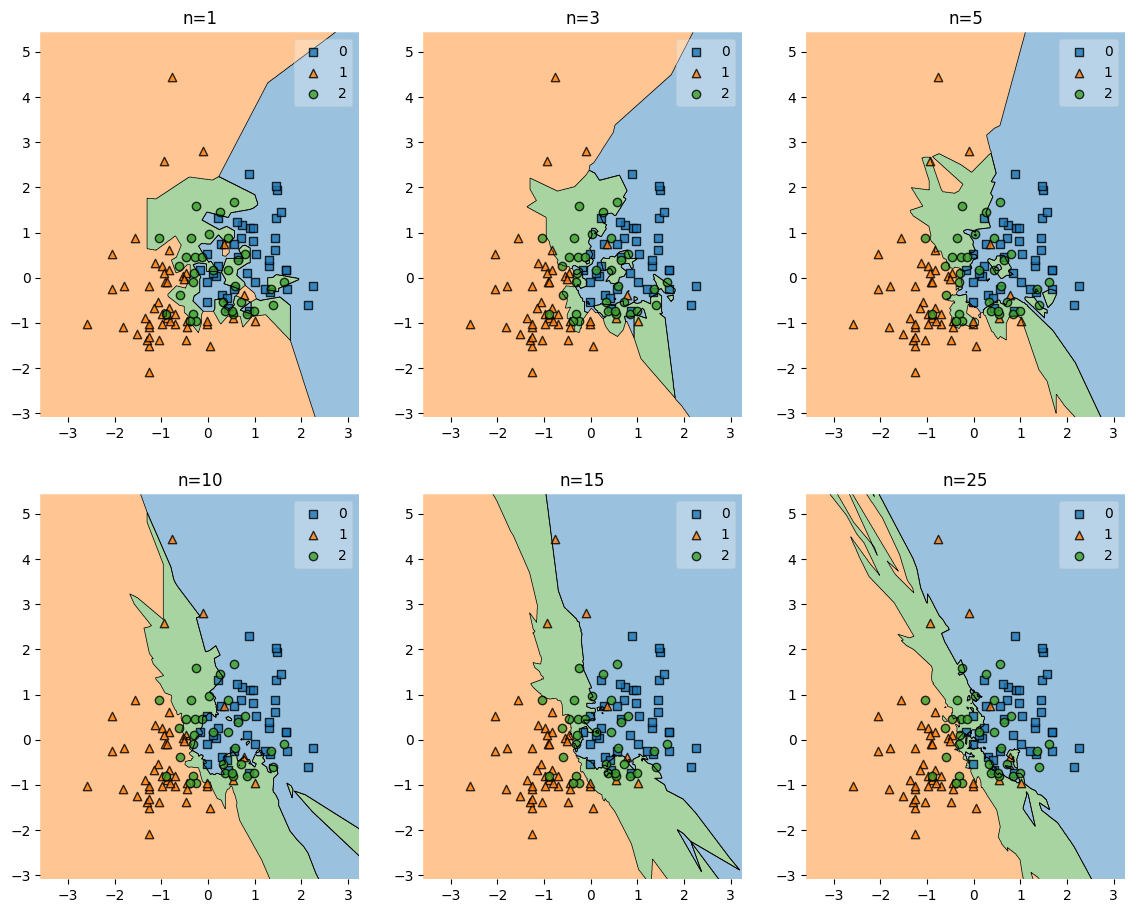

In [12]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

gs = gridspec.GridSpec(2, 3)

fig = plt.figure(figsize=(14,11))

labels = ['n=1', 'n=3', 'n=5', 'n=10','n=15','n=25']
coordinates = itertools.product(range(2), range(3))
for clf, lab, grd in zip(learnedKNN, labels, coordinates):
  row, col = grd
  ax = plt.subplot(gs[row, col])
  fig = plot_decision_regions(X=X_train_scaled, y=y_train, clf=clf)
  plt.title(lab)

plt.show()

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности. Какие из результатов явно говорят о переобучении модели? Почему?

In [78]:
# в номере 1.3 мы видим, что наилучшие значения на тестовой выборке достигаются при n=10 и n=25, также видно
# что точность предсказания при увеличении числа соседей уменьшается на трейн выборке, что говорит об уменьшении переобучения
# (видно что при n=1,3,5 практически все точки попали в свой класс, что говорит о переобучении, также видно, что график поверхности становится
# "рваным" и не однородным). В свою очередь на графиках при n=10,15,25 виден определенный патерн распределения, также достаточное количество точек не попало
# в свой класс, что говорит об отсутствии переобучения. Оптимальное число соседей это 25(так как нет переобучения и самая высокая доля верных ответов).
# Но также можно попробовать выбрать n=10, так как переобучение сильно не выделяется и достаточно высокая доля верных ответов.

### Задание 2. KNN своими руками. 2 Балла

В данном задании мы попробуем реализовать алгоритм KNN своими руками. В данном случае мы попробуем сделать KNN для классификации.

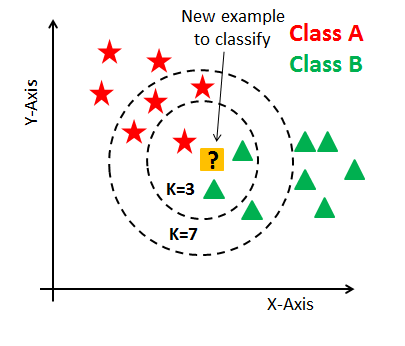

In [79]:
import numpy as np
from collections import Counter

class KNN:
    def __init__(self, k:int):
        self.k = k

    def fit(self, X, y):
      self.X = X
      self.y = y

    def predict(self, X):
      distance = np.ndarray((len(X), len(self.X)))
      for i in range (len(X)):
        distance[i] = self.count_distance(self.X,X[i])
        indices = distance.argsort(axis=1)[:, :self.k]
        y = self.y[indices]
        a=[]
        for i in y:
          counter = Counter(i)
          most_common_element = counter.most_common(1)[0][0]
          a.append(most_common_element)
        return np.array(a)


    def count_distance(self, x, y):
      return np.linalg.norm(x - y,axis=1)


In [80]:
# Не меняйте файл!
def test_knn(KNN):
  knn = KNN(k=1)
  X_train =  np.array([[1, 1], [2, 2]])
  y_train =  np.array([0, 1])
  X_test =  np.array([[1.5, 1.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [0]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[9.5, 9.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5.5, 5.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[15, 15]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5, 5], [2, 2]])
  knn.fit(X_train, y_train)
  assert all(knn.predict(X_test) == [1, 0])

In [81]:
# Если тесты эти пройдены, то все верно!
test_knn(KNN)

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [18]:
!wget "https://github.com/artemkumin1/eda/raw/main/archive%20(4).zip"

--2024-03-22 16:43:18--  https://github.com/artemkumin1/eda/raw/main/archive%20(4).zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/artemkumin1/eda/main/archive%20(4).zip [following]
--2024-03-22 16:43:18--  https://raw.githubusercontent.com/artemkumin1/eda/main/archive%20(4).zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 750893 (733K) [application/zip]
Saving to: ‘archive (4).zip’

archive (4).zip     100%[===================>] 733.29K  --.-KB/s    in 0.006s  

2024-03-22 16:43:19 (111 MB/s) - ‘archive (4).zip’ saved [750893/750893]



In [19]:
!unzip 'archive (4).zip'

Archive:  archive (4).zip
  inflating: diamonds.csv            


In [82]:
import pandas as pd
data = pd.read_csv('/content/diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.2 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их.
Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [83]:
data.isna().sum().sum()
#пропущенных значений нет

0

In [84]:
data = data.drop('Unnamed: 0', axis=1)
data
# ненужным столбцом является столбец "Unnamed: 0", просто повторяющий индексацию строк

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


**Задача 3.2 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [85]:
data.corr(numeric_only=True)
# больше всего с целевой переменной price коррелируют такие признаки как количество каратов- carat,
# а также значения x,y,z (длина, ширина, и глубина камня, соответсвенно)

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


**Задача 3.3 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [86]:

one_hot_cut = pd.get_dummies(data['cut'],prefix='cut')
one_hot_color = pd.get_dummies(data['color'],prefix='color')
one_hot_clarity = pd.get_dummies(data['clarity'],prefix='clarity')
one_hot_encoded = pd.concat([one_hot_cut, one_hot_color, one_hot_clarity], axis=1)

data_new=pd.concat([data,one_hot_encoded],axis=1)
data_new = data_new.drop(['cut', 'color', 'clarity'], axis=1)
data_new

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,0,0,1,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,0,1,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,0,0,0,...,0,0,0,0,0,1,0,0,0,0


**Задача 3.4 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3. Не забудьте про параметр `stratify`.

In [87]:
y=data_new['price']
data_new=data_new.drop('price',axis=1)

In [88]:
np.random.seed(52)
y_binned = pd.cut(y, bins=25, labels=False)
X_trainreg, X_testreg, y_trainreg, y_testreg = train_test_split(data_new,y, test_size=0.3,stratify=y_binned)


**Задача 3.5 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [89]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_features = ['carat', 'depth', 'table','x','y','z']
X_trainreg[numerical_features] = scaler.fit_transform(X_trainreg[numerical_features])
X_testreg[numerical_features] = scaler.transform(X_testreg[numerical_features])



**Задача 3.6 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [90]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_trainreg, y_trainreg)
y_train_predicted = reg.predict(X_trainreg)
y_test_predicted = reg.predict(X_testreg)
mse_train = np.mean((y_train_predicted - y_trainreg) ** 2)
mse_test = np.mean((y_test_predicted - y_testreg) ** 2)
print(f'MSE_train: {mse_train}')
print(f'MSE_test: {mse_test}')


MSE_train: 1267701.493328144
MSE_test: 1298006.1621354378


**Задача 3.7 (0.2 балла)** Изучите [документацию](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [91]:
data_new.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Fair', 'cut_Good',
       'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_D', 'color_E',
       'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'clarity_I1',
       'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2'],
      dtype='object')

In [92]:
columns = ['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Fair',
       'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_D',
       'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J',
       'clarity_I1', 'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2']
coef = pd.DataFrame(reg.coef_, columns=['коэффицент'])
coef.index = columns
coef
#коэффиценты при переменных  carat, clarity_I1,color_J по модулю на порядок выше других коэффицентов


,коэффицент
carat,5322.742782
depth,-95.460786
table,-60.503148
x,-1108.808314
y,13.790957
z,-44.230822
cut_Fair,-608.533013
cut_Good,7.990911
cut_Ideal,259.498828
cut_Premium,183.066053


**Задача 3.8 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом.

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией.

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [93]:
from sklearn import linear_model
from sklearn.linear_model import Ridge
lasso = linear_model.Lasso(alpha=10).fit(X_trainreg, y_trainreg)
ridge = linear_model.Ridge(alpha=10).fit(X_trainreg, y_trainreg)



lasso_coef_df = pd.DataFrame(lasso.coef_, columns=['коэффицент лассо'])
lasso_coef_df.index = columns

ridge_coef_df = pd.DataFrame(ridge.coef_, columns=['коэффицент ридж'])
ridge_coef_df.index = columns


result=pd.concat([lasso_coef_df,ridge_coef_df],axis=1)
result

#при L1 регуляризации коэффиценты уменьшились существенно(некоторые даже занулилсь(4 коэффицента)
#при L2 регуляризации коэффицента уменьшились, но совсем незначительно
# зануление некоторых признаков может говорить о наличии мультиколлинеарности признаков в исходной выборке
# так как теперь признаки которые сильно коррелировали с другими занулились
# можно сделать вывод что мультиколлинеарность была сильной проблемой изначально

,коэффицент лассо,коэффицент ридж
carat,4845.106040,5283.495518
depth,-106.799170,-94.091803
table,-79.366642,-60.891005
x,-691.376640,-1067.191380
y,-0.000000,11.251226
z,-45.021538,-47.830038
cut_Fair,-470.284124,-611.153035
cut_Good,-28.205925,8.236416
cut_Ideal,86.281092,260.336363
cut_Premium,0.000000,183.249388


**Задача 3.9 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов.

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.231e+07, tolerance: 6.006e+07
  model = cd_fast.enet_coordinate_descent(


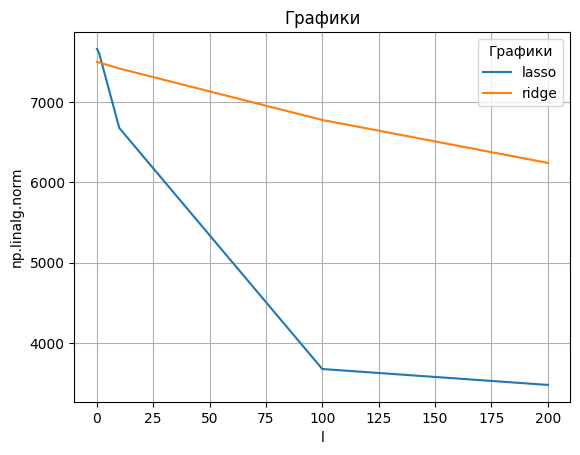

In [94]:
l=[0.1,1,10,100,200]
lasso1=[]
ridge1=[]
for i in l:
  lasso = linear_model.Lasso(alpha=i).fit(X_trainreg, y_trainreg)
  ridge = linear_model.Ridge(alpha=i).fit(X_trainreg, y_trainreg)
  lasso1.append(np.linalg.norm(lasso.coef_))
  ridge1.append(np.linalg.norm(ridge.coef_))
plt.grid(True)


plt.title('Графики')
plt.xlabel('l')
plt.ylabel('np.linalg.norm')
plt.plot(l, lasso1,label='lasso')
plt.plot(l, ridge1,label='ridge')
plt.legend(title="Графики")
plt.show()

# из график видно что Lasso регуляризация намного агрессивней уменьшает веса
# как мы видим из задания выше, Lasso занулила некторой признаки, что дает нам отобрать другие признаки.
# Cвязанно это с возможностью сильно уменьшать коэффиценты


**Задача 3.10 (0.5 балла)**
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке.

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`.

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество.

In [95]:
from sklearn.linear_model import LassoCV
alphas = [0.1,1,10,100,200]
reg = LassoCV(cv=5,alphas=alphas).fit(data_new, y)
mse = pd.DataFrame(reg.mse_path_)
mse


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.069e+08, tolerance: 8.585e+07
  model = cd_fast.enet_coordinate_descent(


,0,1,2,3,4
0,4.192358e+06,2.215411e+06,2.238006e+07,836540.882021,2.151282e+06
1,2.966437e+06,2.379462e+06,2.086133e+07,407790.937038,1.193186e+06
2,1.041020e+06,1.612653e+06,9.785099e+06,479798.793849,5.870416e+05
3,8.954038e+05,1.498943e+06,7.699029e+06,733549.223867,6.248652e+05
4,8.872540e+05,1.489767e+06,7.432601e+06,765942.906920,6.339188e+05


In [96]:
a=pd.DataFrame(mse.mean(axis=1))
a
# как видно из таблички снизу при альфа номер 4 средняя ошибка минимальна, теперь найдем какому альфа соответствует 4

,0
0,6.355130e+06
1,5.561640e+06
2,2.701122e+06
3,2.290358e+06
4,2.241897e+06


In [97]:
real_alphas = reg.alphas_
real_alphas
# как видно альфа номер 4 соответсвует 0.1

array([2.e+02, 1.e+02, 1.e+01, 1.e+00, 1.e-01])

**Задача 3.11 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [98]:
from sklearn import linear_model
lasso = linear_model.Lasso(alpha=0.1).fit(X_trainreg, y_trainreg)
coef = pd.DataFrame(lasso.coef_, columns=['коэффицент'])
coef.index = columns
coef
# наиболее информативные : carat(что логично, чем больше, тем цена больше),clarity_I1(SI2(ясно, что если бриллиант очень грязный, то стоимсть не может быть большой)
#color j(самый плохой цвет по тем же размышлениям) и  x(длина, в данном случае подразумевается, что чем больше камень, тем он дешевле, так как зачастую магазины продают только маленкие редкие камни, иначе бы их цена была колоссальной)
# наиболее неинформативные: cut_Very Good(0), y,z(ширина и глубина не обладает особой ценностью)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.231e+07, tolerance: 6.006e+07
  model = cd_fast.enet_coordinate_descent(


,коэффицент
carat,5318.047960
depth,-95.647507
table,-60.697931
x,-1102.424798
y,10.975348
z,-43.888517
cut_Fair,-763.871360
cut_Good,-148.979948
cut_Ideal,101.147183
cut_Premium,24.366536


**Задача 3.12 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [99]:
from sklearn import linear_model
lasso = linear_model.Lasso(alpha=0.1).fit(X_trainreg, y_trainreg)
y_test_predicted = lasso.predict(X_testreg)
squared_errorstest = (y_test_predicted - y_testreg) ** 2
mse_test = np.mean(squared_errorstest)

print(f'Lasso_mse_test: {mse_test}')
#linear_MSE_test: 1298006.1621354378

Lasso_mse_test: 1297994.342501513


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.231e+07, tolerance: 6.006e+07
  model = cd_fast.enet_coordinate_descent(


In [69]:
# как мы видим модель Lasso дала меньшую среднеквадратическую ошибку, поэтому в для предсказаний в данном случае лучше
# использовать модель Lasso. Можно предположить, что это связанно это тем, что присутстовала мультиколлинеарность, которая приводила к переобучению,
# а Lasso, уменьшив коэффиценты сделала переобучение менее возможным. (Стоит отметить, что при разных значениях random seed ситуация меняется
# и в каких то случаях Lasso немного уступает линейной регрессии)